In [4]:
import pandas as pd
import numpy as np
from numpy import nan
from collections import OrderedDict
from datetime import datetime, timedelta

In [5]:
df = pd.read_excel('Updated_DataFrame.xlsx', 'SentimentScore', usecols=12)
df


,Headline,Source,Date,Word Count,Text,Company,Industry,IPO Period,Day of Week,Source Tier,PositiveScore,NegativeScore
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook wooed Madison Avenue on Wednesday wit...,Facebook,Technology,1,4,4,0.0,0.0
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook Inc. priced its shares in its initial...,Facebook,Technology,1,5,4,0.0,0.0
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,NEW YORK -- Securities regulators are amping u...,Facebook,Technology,2,3,4,0.0,0.0
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,WASHINGTON -- A class-action lawsuit was filed...,Facebook,Technology,2,4,4,0.0,0.0
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,The most anticipated IPO since Google is one s...,Facebook,Technology,1,6,4,0.0,0.0
5,Facebook IPO set to be global giant,Abilene Reporter-News,2012-05-18,188,Early investors stand to reap as much as $18.4...,Facebook,Technology,2,6,4,0.0,0.0
6,LinkedIn to an IPO,Abilene Reporter-News,2011-05-18,570,NaN,LinkedIn,Technology,1,4,4,0.0,0.0
7,"Mobile, local are key to Facebook's post-IPO g...",Advertising Age,2012-02-06,874,Facebook reaches more than half the world's in...,Facebook,Technology,1,2,2,0.0,0.0
8,HANDICAPPING THE PROSPECT FOR GROUPON'S IPO,Advertising Age,2011-09-19,281,With the recent reports of both Groupon and Zy...,Groupon,Retail,1,2,2,0.0,0.0
9,6 THINGS MARKETERS NEED TO KNOW ABOUT SNAPCHAT...,Advertising Age,2017-02-06,329,The IPO filing from Snapchat parent Snap Inc. ...,Snapchat,Technology,1,2,2,0.0,0.0


In [6]:
df['Ticker'] = df.index

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5395 entries, 0 to 5394
Data columns (total 13 columns):
Headline         5395 non-null object
Source           5395 non-null object
Date             5395 non-null datetime64[ns]
Word Count       5395 non-null int64
Text             4476 non-null object
Company          5395 non-null object
Industry         5395 non-null object
IPO Period       5395 non-null int64
Day of Week      5395 non-null int64
Source Tier      5395 non-null int64
PositiveScore    5395 non-null float64
NegativeScore    5395 non-null float64
Ticker           5395 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 590.1+ KB


In [8]:
company_ticker = {
    'Facebook': 'FB',
    'LinkedIn': 'LNKD',
    'Groupon': 'GRPN',
    'Snapchat': 'SNAP',
    'Twitter': 'TWTR',
    'Alibaba': 'BABA',
    'Etsy': 'ETSY',
    'Fitbit': 'FIT',
    'Workday': 'WDAY',
    'GoPro': 'GPRO',
    'Blue Apron': 'APRN',
    'Ferrari': 'RACE',
    'General Motors': 'GM',
    'Shake Shack': 'SHAK',
    'Stitch Fix': 'SFIX',
    'Tesls': 'TSLA',
}

In [9]:
df['Ticker'] = df['Company'].map(company_ticker)
df.head()

,Headline,Source,Date,Word Count,Text,Company,Industry,IPO Period,Day of Week,Source Tier,PositiveScore,NegativeScore,Ticker
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook wooed Madison Avenue on Wednesday wit...,Facebook,Technology,1,4,4,0.0,0.0,FB
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook Inc. priced its shares in its initial...,Facebook,Technology,1,5,4,0.0,0.0,FB
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,NEW YORK -- Securities regulators are amping u...,Facebook,Technology,2,3,4,0.0,0.0,FB
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,WASHINGTON -- A class-action lawsuit was filed...,Facebook,Technology,2,4,4,0.0,0.0,FB
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,The most anticipated IPO since Google is one s...,Facebook,Technology,1,6,4,0.0,0.0,FB


In [10]:
mkt_prices = pd.read_csv('IPO_MKT_PRICES.csv')

In [11]:
mkt_prices = mkt_prices.rename(columns={'Symbol': 'Ticker'})
mkt_prices.head()

,Ticker,Date,Close,High,Low,Open,Volume
0,FB,2012-05-18,38.2318,45.00,38.00,42.00,580587742.0
1,FB,2012-05-21,34.0300,36.66,33.00,36.66,168309831.0
2,FB,2012-05-22,31.0000,33.59,30.94,32.59,102053826.0
3,FB,2012-05-23,32.0000,32.50,31.36,31.38,73488656.0
4,FB,2012-05-24,33.0300,33.21,31.77,32.98,50275879.0


In [12]:
mkt_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19892 entries, 0 to 19891
Data columns (total 7 columns):
Ticker    19892 non-null object
Date      19848 non-null object
Close     19848 non-null float64
High      19848 non-null float64
Low       19848 non-null float64
Open      19848 non-null float64
Volume    19848 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [13]:
mkt_prices['Date'] = pd.to_datetime(mkt_prices['Date'])

In [14]:
new_df = pd.merge(df, mkt_prices, on=['Date', 'Ticker'], how='left')
new_df.head()

,Headline,Source,Date,Word Count,Text,Company,Industry,IPO Period,Day of Week,Source Tier,PositiveScore,NegativeScore,Ticker,Close,High,Low,Open,Volume
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook wooed Madison Avenue on Wednesday wit...,Facebook,Technology,1,4,4,0.0,0.0,FB,NaN,NaN,NaN,NaN,NaN
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook Inc. priced its shares in its initial...,Facebook,Technology,1,5,4,0.0,0.0,FB,NaN,NaN,NaN,NaN,NaN
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,NEW YORK -- Securities regulators are amping u...,Facebook,Technology,2,3,4,0.0,0.0,FB,31.0,33.59,30.94,32.59,102053826.0
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,WASHINGTON -- A class-action lawsuit was filed...,Facebook,Technology,2,4,4,0.0,0.0,FB,32.0,32.50,31.36,31.38,73488656.0
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,The most anticipated IPO since Google is one s...,Facebook,Technology,1,6,4,0.0,0.0,FB,NaN,NaN,NaN,NaN,NaN


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5395 entries, 0 to 5394
Data columns (total 18 columns):
Headline         5395 non-null object
Source           5395 non-null object
Date             5395 non-null datetime64[ns]
Word Count       5395 non-null int64
Text             4476 non-null object
Company          5395 non-null object
Industry         5395 non-null object
IPO Period       5395 non-null int64
Day of Week      5395 non-null int64
Source Tier      5395 non-null int64
PositiveScore    5395 non-null float64
NegativeScore    5395 non-null float64
Ticker           5301 non-null object
Close            1711 non-null float64
High             1711 non-null float64
Low              1711 non-null float64
Open             1711 non-null float64
Volume           1711 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(4), object(6)
memory usage: 800.8+ KB


In [16]:
ipo_info = pd.read_csv('IPO_INFO.csv', sep='|', index_col=False)
ipo_info = ipo_info.rename(columns={'Symbol': 'Ticker', 'Date': 'Offer Date'})
ipo_info['Offer Date'] = pd.to_datetime(ipo_info['Offer Date'])
ipo_info.drop(['Performed'], axis=1, inplace=True)
ipo_info.drop(['Ratings'], axis=1, inplace=True)
ipo_info

,Ticker,Offer Date,Issuer,Managers,Offer Price,Open Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close
0,FB,2012-05-18,Facebook,"Morgan Stanley/ J.P. Morgan/ Goldman, Sachs",38,42.00,38.23,0.006053,4.00,0.23
1,LNKD,2011-05-19,LinkedIn,Morgan Stanley/ BofA Merrill Lynch /J..P. Morg...,45,83.00,94.25,1.094444,38.00,49.25
2,GRPN,2011-11-04,Groupon,"Morgan Stanley/ Goldman, Sachs/ Credit Suisse",20,28.00,26.11,0.305500,8.00,6.11
3,SNAP,2017-03-02,Snap,Morgan Stanley/ Goldma Sachs/ J. P. Morgan/ De...,17,23.71,24.48,0.440000,6.71,7.48
4,TWTR,2013-11-07,Twitter,Goldman Sachs/ Morgan Stanley/ J.P. Morgan/ Bo...,26,45.10,44.90,0.726923,19.10,18.90
5,BABA,2014-09-19,Alibaba Group Holding,Credit Suisse/ Deutsche Bank Securities/ Goldm...,68,92.70,93.89,0.380735,24.70,25.89
6,ETSY,2015-04-16,Etsy,Goldman Sachs,16,31.00,30.00,0.875000,15.00,14.00
7,FIT,2015-06-18,Fitbit,Morgan Stanley/ Deutsche Bank Securities/ BofA...,20,30.40,29.68,0.484000,10.40,9.68
8,WDAY,2012-10-12,Workday,"Morgan Stanley/ Goldman, Sachs",28,48.05,48.69,0.738929,20.05,20.69
9,GPRO,2014-06-26,GoPro,J.P. Morgan/ Citigroup/ Barclays,24,28.65,31.34,0.305833,4.65,7.34


In [17]:
managers = dict(zip(ipo_info['Ticker'], ipo_info['Managers']))
managers

{'APRN': 'Goldman Sachs/ Morgan Stanley/ Citigroup/ Barclays',
 'BABA': 'Credit Suisse/ Deutsche Bank Securities/ Goldman Sachs/ J.P. Morgan/ Morgan Stanley/ Citi',
 'ETSY': 'Goldman Sachs',
 'FB': 'Morgan Stanley/ J.P. Morgan/ Goldman, Sachs',
 'FIT': 'Morgan Stanley/ Deutsche Bank Securities/ BofAMerrill Lynch',
 'GM': 'Morgan Stanley/ J.P. Morgan/ BofA Merrill Lynch/ Citi',
 'GPRO': 'J.P. Morgan/ Citigroup/ Barclays',
 'GRPN': 'Morgan Stanley/ Goldman, Sachs/ Credit Suisse',
 'LNKD': 'Morgan Stanley/ BofA Merrill Lynch /J..P. Morgan Securities',
 'RACE': 'UBS Investment Bank/ BofA Merrill Lynch/ Santander',
 'SFIX': 'Goldman Sachs/ J.P. Morgan Securities',
 'SHAK': 'J.P. Morgan/ Morgan Stanley',
 'SNAP': 'Morgan Stanley/ Goldma Sachs/ J. P. Morgan/ Deutsche Bank Securities',
 'TSLA': 'Goldman, Sachs/ Morgan Stanley/ J.P. Morgan/ Deutsche Bank Securities',
 'TWTR': 'Goldman Sachs/ Morgan Stanley/ J.P. Morgan/ BofA Merrill Lynch/ Deutsche Bank Securities',
 'WDAY': 'Morgan Stanley/ Go

In [18]:
for k,v in managers.items():
    managers[k] = (v.split('/ '))
managers

{'APRN': ['Goldman Sachs', 'Morgan Stanley', 'Citigroup', 'Barclays'],
 'BABA': ['Credit Suisse',
  'Deutsche Bank Securities',
  'Goldman Sachs',
  'J.P. Morgan',
  'Morgan Stanley',
  'Citi'],
 'ETSY': ['Goldman Sachs'],
 'FB': ['Morgan Stanley', 'J.P. Morgan', 'Goldman, Sachs'],
 'FIT': ['Morgan Stanley', 'Deutsche Bank Securities', 'BofAMerrill Lynch'],
 'GM': ['Morgan Stanley', 'J.P. Morgan', 'BofA Merrill Lynch', 'Citi'],
 'GPRO': ['J.P. Morgan', 'Citigroup', 'Barclays'],
 'GRPN': ['Morgan Stanley', 'Goldman, Sachs', 'Credit Suisse'],
 'LNKD': ['Morgan Stanley', 'BofA Merrill Lynch /J..P. Morgan Securities'],
 'RACE': ['UBS Investment Bank', 'BofA Merrill Lynch', 'Santander'],
 'SFIX': ['Goldman Sachs', 'J.P. Morgan Securities'],
 'SHAK': ['J.P. Morgan', 'Morgan Stanley'],
 'SNAP': ['Morgan Stanley',
  'Goldma Sachs',
  'J. P. Morgan',
  'Deutsche Bank Securities'],
 'TSLA': ['Goldman, Sachs',
  'Morgan Stanley',
  'J.P. Morgan',
  'Deutsche Bank Securities'],
 'TWTR': ['Goldman 

In [19]:
managers_df = pd.DataFrame.from_dict(managers, orient='index')
managers_df.columns = ('Mngr1', 'Mngr2', 'Mngr3', 'Mngr4', 'Mngr5', 'Mngr6')
managers_df.loc['FB'][2] = 'Goldman Sachs'
managers_df.loc['LNKD'][2] = 'J.P.Morgan'
managers_df.loc['LNKD'][1] = 'BofA Merrill Lynch'
managers_df.loc['GRPN'][1] = 'Goldman Sachs'
managers_df.loc['SNAP'][1] = 'Goldman Sachs'
managers_df.loc['BABA'][5] = 'Citigroup'
managers_df.loc['FIT'][2] = 'BofA Merrill Lynch'
managers_df.loc['WDAY'][1] = 'Goldman Sachs'
managers_df.loc['GM'][3] = 'Citigroup'
managers_df.loc['SFIX'][1] = 'J.P.Morgan'
managers_df.loc['TSLA'][0] = 'Goldman Sachs'
#managers_df.reset_index(level=0, inplace=True)
managers_df.index.name = 'Ticker'
managers_df.fillna(value=nan, inplace=True)
managers_df

,Mngr1,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6
Ticker,,,,,,
FB,Morgan Stanley,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN
LNKD,Morgan Stanley,BofA Merrill Lynch,J.P.Morgan,NaN,NaN,NaN
GRPN,Morgan Stanley,Goldman Sachs,Credit Suisse,NaN,NaN,NaN
SNAP,Morgan Stanley,Goldman Sachs,J. P. Morgan,Deutsche Bank Securities,NaN,NaN
TWTR,Goldman Sachs,Morgan Stanley,J.P. Morgan,BofA Merrill Lynch,Deutsche Bank Securities,NaN
BABA,Credit Suisse,Deutsche Bank Securities,Goldman Sachs,J.P. Morgan,Morgan Stanley,Citigroup
ETSY,Goldman Sachs,NaN,NaN,NaN,NaN,NaN
FIT,Morgan Stanley,Deutsche Bank Securities,BofA Merrill Lynch,NaN,NaN,NaN
WDAY,Morgan Stanley,Goldman Sachs,NaN,NaN,NaN,NaN


In [20]:
new_ipo_info = pd.merge(ipo_info, managers_df, on='Ticker')
del new_ipo_info['Managers']
new_ipo_info

,Ticker,Offer Date,Issuer,Offer Price,Open Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Mngr1,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6
0,FB,2012-05-18,Facebook,38,42.00,38.23,0.006053,4.00,0.23,Morgan Stanley,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN
1,LNKD,2011-05-19,LinkedIn,45,83.00,94.25,1.094444,38.00,49.25,Morgan Stanley,BofA Merrill Lynch,J.P.Morgan,NaN,NaN,NaN
2,GRPN,2011-11-04,Groupon,20,28.00,26.11,0.305500,8.00,6.11,Morgan Stanley,Goldman Sachs,Credit Suisse,NaN,NaN,NaN
3,SNAP,2017-03-02,Snap,17,23.71,24.48,0.440000,6.71,7.48,Morgan Stanley,Goldman Sachs,J. P. Morgan,Deutsche Bank Securities,NaN,NaN
4,TWTR,2013-11-07,Twitter,26,45.10,44.90,0.726923,19.10,18.90,Goldman Sachs,Morgan Stanley,J.P. Morgan,BofA Merrill Lynch,Deutsche Bank Securities,NaN
5,BABA,2014-09-19,Alibaba Group Holding,68,92.70,93.89,0.380735,24.70,25.89,Credit Suisse,Deutsche Bank Securities,Goldman Sachs,J.P. Morgan,Morgan Stanley,Citigroup
6,ETSY,2015-04-16,Etsy,16,31.00,30.00,0.875000,15.00,14.00,Goldman Sachs,NaN,NaN,NaN,NaN,NaN
7,FIT,2015-06-18,Fitbit,20,30.40,29.68,0.484000,10.40,9.68,Morgan Stanley,Deutsche Bank Securities,BofA Merrill Lynch,NaN,NaN,NaN
8,WDAY,2012-10-12,Workday,28,48.05,48.69,0.738929,20.05,20.69,Morgan Stanley,Goldman Sachs,NaN,NaN,NaN,NaN
9,GPRO,2014-06-26,GoPro,24,28.65,31.34,0.305833,4.65,7.34,J.P. Morgan,Citigroup,Barclays,NaN,NaN,NaN


In [21]:
new_ipo_info['Offer Date +90'] = new_ipo_info['Offer Date'] + timedelta(days=90)
new_ipo_info

,Ticker,Offer Date,Issuer,Offer Price,Open Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Mngr1,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6,Offer Date +90
0,FB,2012-05-18,Facebook,38,42.00,38.23,0.006053,4.00,0.23,Morgan Stanley,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16
1,LNKD,2011-05-19,LinkedIn,45,83.00,94.25,1.094444,38.00,49.25,Morgan Stanley,BofA Merrill Lynch,J.P.Morgan,NaN,NaN,NaN,2011-08-17
2,GRPN,2011-11-04,Groupon,20,28.00,26.11,0.305500,8.00,6.11,Morgan Stanley,Goldman Sachs,Credit Suisse,NaN,NaN,NaN,2012-02-02
3,SNAP,2017-03-02,Snap,17,23.71,24.48,0.440000,6.71,7.48,Morgan Stanley,Goldman Sachs,J. P. Morgan,Deutsche Bank Securities,NaN,NaN,2017-05-31
4,TWTR,2013-11-07,Twitter,26,45.10,44.90,0.726923,19.10,18.90,Goldman Sachs,Morgan Stanley,J.P. Morgan,BofA Merrill Lynch,Deutsche Bank Securities,NaN,2014-02-05
5,BABA,2014-09-19,Alibaba Group Holding,68,92.70,93.89,0.380735,24.70,25.89,Credit Suisse,Deutsche Bank Securities,Goldman Sachs,J.P. Morgan,Morgan Stanley,Citigroup,2014-12-18
6,ETSY,2015-04-16,Etsy,16,31.00,30.00,0.875000,15.00,14.00,Goldman Sachs,NaN,NaN,NaN,NaN,NaN,2015-07-15
7,FIT,2015-06-18,Fitbit,20,30.40,29.68,0.484000,10.40,9.68,Morgan Stanley,Deutsche Bank Securities,BofA Merrill Lynch,NaN,NaN,NaN,2015-09-16
8,WDAY,2012-10-12,Workday,28,48.05,48.69,0.738929,20.05,20.69,Morgan Stanley,Goldman Sachs,NaN,NaN,NaN,NaN,2013-01-10
9,GPRO,2014-06-26,GoPro,24,28.65,31.34,0.305833,4.65,7.34,J.P. Morgan,Citigroup,Barclays,NaN,NaN,NaN,2014-09-24


In [22]:
new_ipo_info = pd.merge(new_ipo_info,
                       mkt_prices[['Date', 'Ticker', 'Close']],
                       left_on = ['Offer Date +90', 'Ticker'],
                       right_on = ['Date', 'Ticker'],
                       how='left')

In [23]:
new_ipo_info = new_ipo_info.rename(columns={'Close': 'Close +90'})
new_ipo_info['% Px Chng +90'] = (new_ipo_info['Close +90'] - new_ipo_info['1st Day Close'])/new_ipo_info['1st Day Close']
new_ipo_info['Label'] = ''

new_ipo_info

,Ticker,Offer Date,Issuer,Offer Price,Open Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Mngr1,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6,Offer Date +90,Date,Close +90,% Px Chng +90,Label
0,FB,2012-05-18,Facebook,38,42.00,38.23,0.006053,4.00,0.23,Morgan Stanley,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,
1,LNKD,2011-05-19,LinkedIn,45,83.00,94.25,1.094444,38.00,49.25,Morgan Stanley,BofA Merrill Lynch,J.P.Morgan,NaN,NaN,NaN,2011-08-17,2011-08-17,81.75,-0.132626,
2,GRPN,2011-11-04,Groupon,20,28.00,26.11,0.305500,8.00,6.11,Morgan Stanley,Goldman Sachs,Credit Suisse,NaN,NaN,NaN,2012-02-02,2012-02-02,23.08,-0.116047,
3,SNAP,2017-03-02,Snap,17,23.71,24.48,0.440000,6.71,7.48,Morgan Stanley,Goldman Sachs,J. P. Morgan,Deutsche Bank Securities,NaN,NaN,2017-05-31,2017-05-31,21.21,-0.133578,
4,TWTR,2013-11-07,Twitter,26,45.10,44.90,0.726923,19.10,18.90,Goldman Sachs,Morgan Stanley,J.P. Morgan,BofA Merrill Lynch,Deutsche Bank Securities,NaN,2014-02-05,2014-02-05,65.97,0.469265,
5,BABA,2014-09-19,Alibaba Group Holding,68,92.70,93.89,0.380735,24.70,25.89,Credit Suisse,Deutsche Bank Securities,Goldman Sachs,J.P. Morgan,Morgan Stanley,Citigroup,2014-12-18,2014-12-18,109.25,0.163596,
6,ETSY,2015-04-16,Etsy,16,31.00,30.00,0.875000,15.00,14.00,Goldman Sachs,NaN,NaN,NaN,NaN,NaN,2015-07-15,2015-07-15,16.82,-0.439333,
7,FIT,2015-06-18,Fitbit,20,30.40,29.68,0.484000,10.40,9.68,Morgan Stanley,Deutsche Bank Securities,BofA Merrill Lynch,NaN,NaN,NaN,2015-09-16,2015-09-16,37.10,0.250000,
8,WDAY,2012-10-12,Workday,28,48.05,48.69,0.738929,20.05,20.69,Morgan Stanley,Goldman Sachs,NaN,NaN,NaN,NaN,2013-01-10,2013-01-10,53.20,0.092627,
9,GPRO,2014-06-26,GoPro,24,28.65,31.34,0.305833,4.65,7.34,J.P. Morgan,Citigroup,Barclays,NaN,NaN,NaN,2014-09-24,2014-09-24,78.46,1.503510,


In [24]:
for i in range(0, len(new_ipo_info)):
    if new_ipo_info['% Px Chng +90'][i] < -0.02:
        new_ipo_info['Label'][i] = 'Negative'
    elif new_ipo_info['% Px Chng +90'][i] > 0.02:
        new_ipo_info['Label'][i] = 'Positive'
    else:
        new_ipo_info['Label'][i] = 'Neutral'

/home/mji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
new_df = pd.merge(new_df, new_ipo_info, on=['Ticker'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5301 entries, 0 to 5300
Data columns (total 37 columns):
Headline             5301 non-null object
Source               5301 non-null object
Date_x               5301 non-null datetime64[ns]
Word Count           5301 non-null int64
Text                 4389 non-null object
Company              5301 non-null object
Industry             5301 non-null object
IPO Period           5301 non-null int64
Day of Week          5301 non-null int64
Source Tier          5301 non-null int64
PositiveScore        5301 non-null float64
NegativeScore        5301 non-null float64
Ticker               5301 non-null object
Close                1711 non-null float64
High                 1711 non-null float64
Low                  1711 non-null float64
Open                 1711 non-null float64
Volume               1711 non-null float64
Offer Date           5301 non-null datetime64[ns]
Issuer               5301 non-null object
Offer Price          5301 non-null

In [26]:
new_df

,Headline,Source,Date_x,Word Count,Text,Company,Industry,IPO Period,Day of Week,Source Tier,...,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6,Offer Date +90,Date_y,Close +90,% Px Chng +90,Label
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook wooed Madison Avenue on Wednesday wit...,Facebook,Technology,1,4,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook Inc. priced its shares in its initial...,Facebook,Technology,1,5,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,NEW YORK -- Securities regulators are amping u...,Facebook,Technology,2,3,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,WASHINGTON -- A class-action lawsuit was filed...,Facebook,Technology,2,4,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,The most anticipated IPO since Google is one s...,Facebook,Technology,1,6,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
5,Facebook IPO set to be global giant,Abilene Reporter-News,2012-05-18,188,Early investors stand to reap as much as $18.4...,Facebook,Technology,2,6,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
6,"Mobile, local are key to Facebook's post-IPO g...",Advertising Age,2012-02-06,874,Facebook reaches more than half the world's in...,Facebook,Technology,1,2,2,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
7,Pre-Facebook U.S. IPO Market Off to a Sluggish...,AdvisorOne,2012-02-13,426,With Facebook's initial public offering set to...,Facebook,Technology,1,2,2,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
8,"Facebook CEO turns 28, IPO could be $100B gift",Aiken Standard,2012-05-14,1470,NaN,Facebook,Technology,1,2,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
9,Facebook raises IPO price as offering nears,Aiken Standard,2012-05-16,753,NaN,Facebook,Technology,1,4,4,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative


In [27]:
new_df = new_df.rename(columns={'Date_x': 'Date'})
del new_df['Text']

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5301 entries, 0 to 5300
Data columns (total 36 columns):
Headline             5301 non-null object
Source               5301 non-null object
Date                 5301 non-null datetime64[ns]
Word Count           5301 non-null int64
Company              5301 non-null object
Industry             5301 non-null object
IPO Period           5301 non-null int64
Day of Week          5301 non-null int64
Source Tier          5301 non-null int64
PositiveScore        5301 non-null float64
NegativeScore        5301 non-null float64
Ticker               5301 non-null object
Close                1711 non-null float64
High                 1711 non-null float64
Low                  1711 non-null float64
Open                 1711 non-null float64
Volume               1711 non-null float64
Offer Date           5301 non-null datetime64[ns]
Issuer               5301 non-null object
Offer Price          5301 non-null int64
Open Price           5301 non-null 

In [29]:
names = [
    'Headline',
    'Source',
    'Date',
    'Word Count',
    'Company',
    'Industry',
    'IPO Period',
    'Day of Week',
    'Source Tier',
    'PositiveScore',
    'NegativeScore',
    'Ticker',
    'Close',
    'High',
    'Low',
    'Open',
    'Volume',
    'Offer Date',
    'Issuer',
    'Offer Price',
    'Open Price',
    '1st Day Close',
    '1st Day % Px Chng',
    '$ Change Opening',
    '$ Change Close',
    'Mngr1',
    'Mngr2',
    'Mngr3',
    'Mngr4',
    'Mngr5',
    'Mngr6',
    'Offer Date +90',
    'Date_y',
    'Close +90',
    '% Px Chng +90',
    'Label'
]
new_df.columns = names
#new_df.head(50)
new_df.to_csv('features.csv', sep='|')

In [30]:
%matplotlib inline
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Setup context and style 
sns.set_context('talk')
sns.set_style('whitegrid')

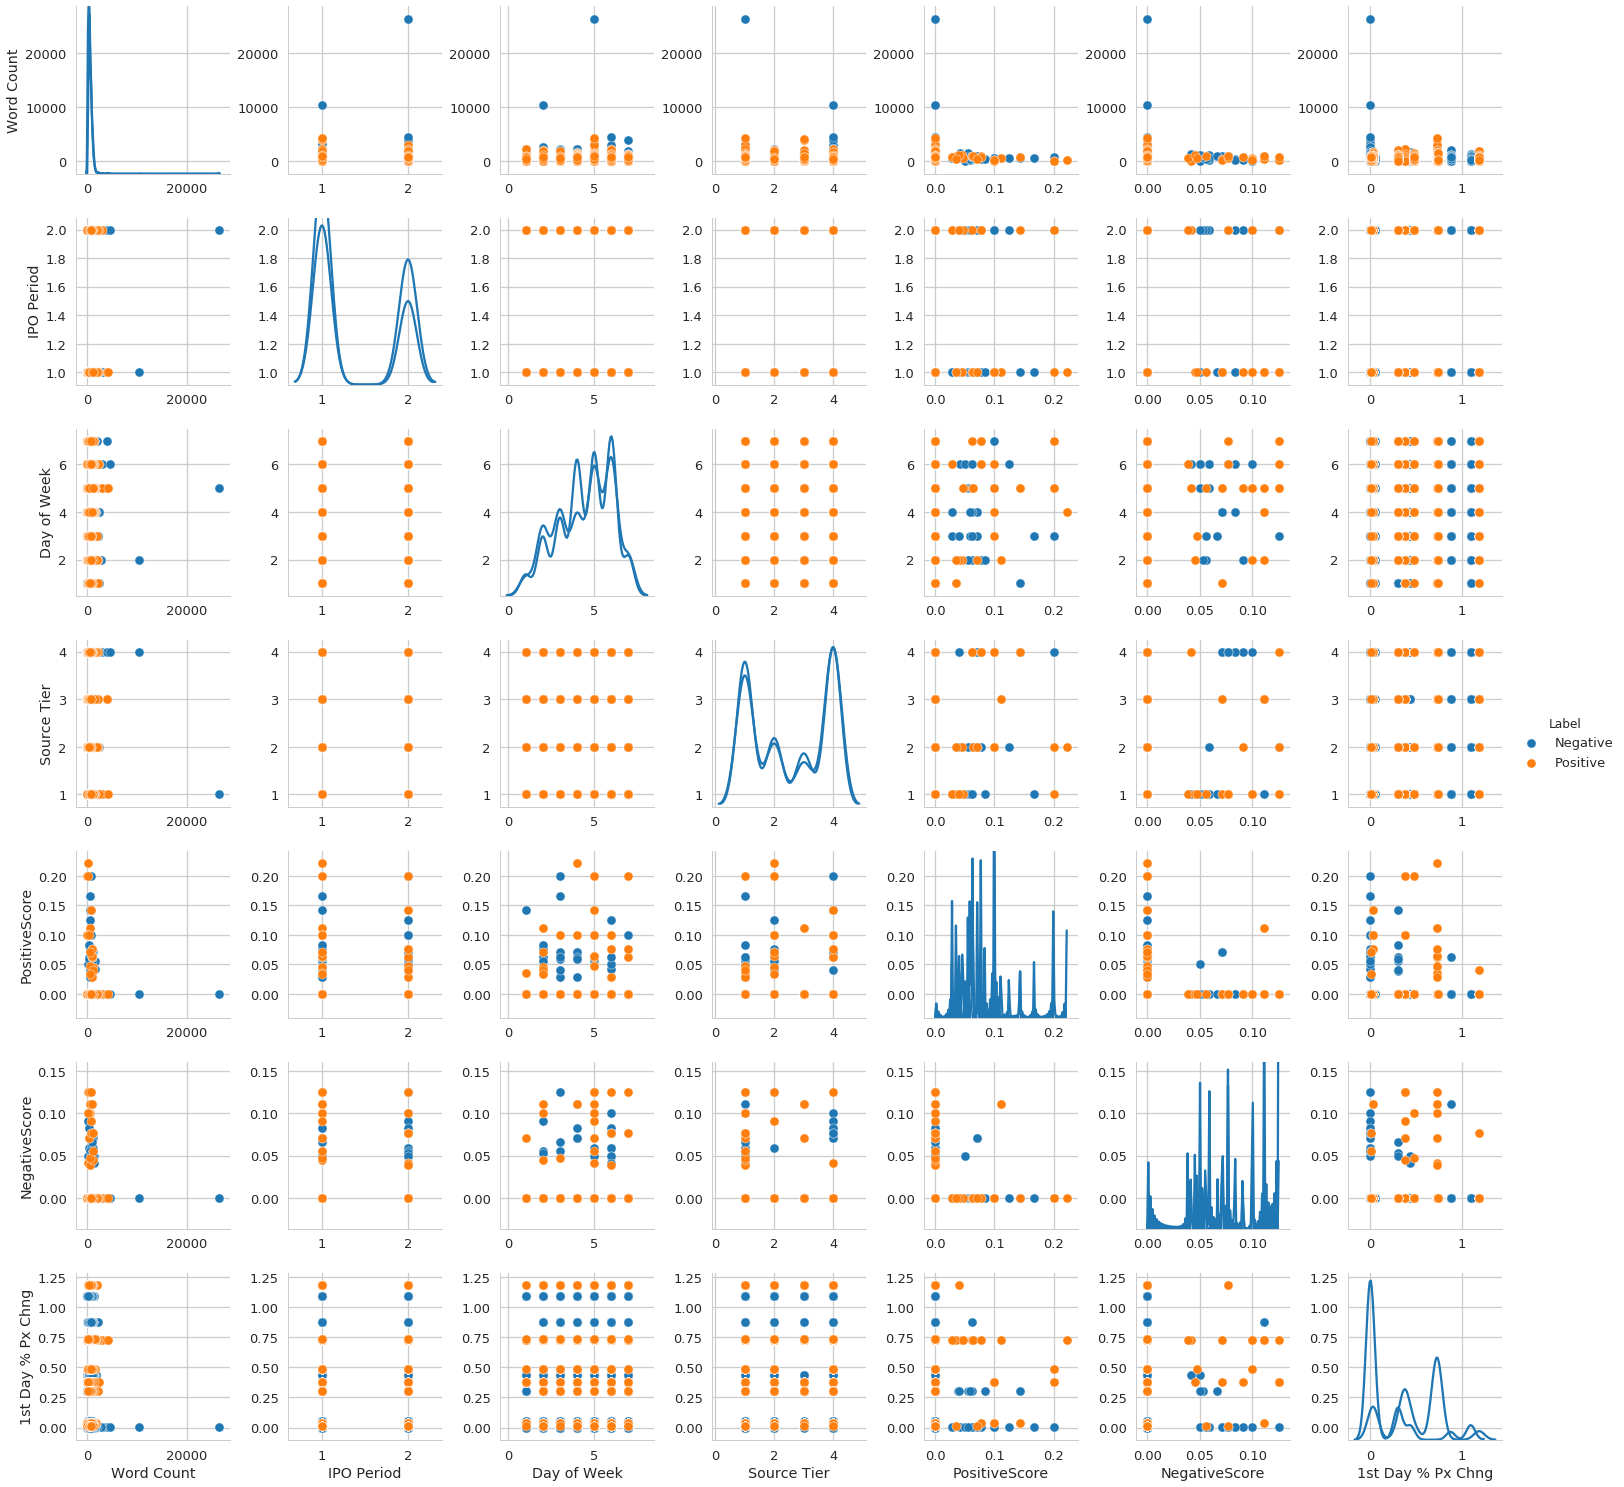

In [31]:
sns.pairplot(new_df[['Source', 'Date', 'Word Count', 'Company', 'Industry', 'IPO Period', 'Day of Week', 'Source Tier',
           'PositiveScore', 'NegativeScore', '1st Day % Px Chng', 'Label']], hue='Label', diag_kind="kde", size=3)

In [32]:
features = ['Source', 'Date', 'Word Count', 'Company', 'Industry', 'IPO Period', 'Day of Week', 'Source Tier',
           'PositiveScore', 'NegativeScore', '1st Day % Px Chng']
#, 'Mngr1', 'Mngr2', 'Mngr3', 'Mngr4', 'Mngr5', 'Mngr6']
target = ['Label']
X = new_df[features]
y = new_df[target]

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None. 
    """
    
    def __init__(self, columns=None):
        self.columns  = [col for col in columns] 
        self.encoders = None
    
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode. 
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns 
        
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns 
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame. 
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        
        return output

In [34]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

In [35]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [36]:
model_selection(X, y, LinearSVC())

1.0

In [37]:
model_selection(X, y, NuSVC())

0.98245614035087725

In [38]:
model_selection(X, y, SVC())

0.98245614035087725

In [39]:
model_selection(X, y, SGDClassifier())

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


1.0

In [40]:
model_selection(X, y, KNeighborsClassifier())

1.0

In [41]:
model_selection(X, y, LogisticRegressionCV())

1.0

In [42]:
model_selection(X, y, LogisticRegression())

1.0

In [43]:
model_selection(X, y, BaggingClassifier())

1.0

In [44]:
model_selection(X, y, ExtraTreesClassifier())

1.0

In [45]:
model_selection(X, y, RandomForestClassifier())

1.0

In [56]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['Positive', 'Negative'])
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.poof()  

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


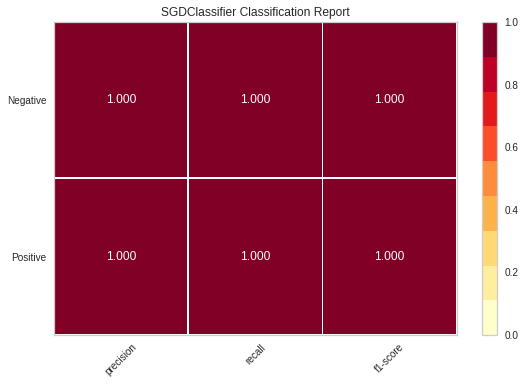

In [57]:
visual_model_selection(X, y, SGDClassifier())

In [55]:
new_df['Label'].value_counts()


Negative    3056
Positive    2245
Name: Label, dtype: int64